In [2]:
import cv2
import numpy as np

### Pypylon Image grabber

In [154]:
from pypylon import pylon
import time
import datetime

camera = pylon.InstantCamera(pylon.TlFactory.GetInstance().CreateFirstDevice())
camera.Open()
time.sleep(5)
# Set the upper limit of the camera's frame rate to 30 fps
# camera.AcquisitionFrameRateEnable.SetValue(True)
# camera.AcquisitionFrameRate.SetValue(10)

# Set the upper limit of the camera's frame rate to 30 fps
camera.AcquisitionFrameRateEnable.Value = True
camera.AcquisitionFrameRateAbs.Value = 5.0
camera.GainRaw.Value = 1
camera.PixelFormat.Value = "BayerRG12"

# demonstrate some feature access
new_width = camera.Width.Value - camera.Width.Inc
if new_width >= camera.Width.Min:
    camera.Width.Value = new_width

numberOfImagesToGrab = 15
print("startedddd")
time.sleep(0.5)

camera.StartGrabbingMax(numberOfImagesToGrab)
img = pylon.PylonImage()
i = 0
print("start")
# time.sleep(2)
while camera.IsGrabbing():
    grabResult = camera.RetrieveResult(1000, pylon.TimeoutHandling_ThrowException)
    img.AttachGrabResultBuffer(grabResult)
    print("inside:::",datetime.datetime.now())
    if grabResult.GrabSucceeded():
        # Access the image data.
        # print("SizeX: ", grabResult.Width)
        # print("SizeY: ", grabResult.Height)
        # img = grabResult.Array
        # print("Gray value of first pixel: ", img[0, 0])

        ipo = pylon.ImagePersistenceOptions()
        # quality = 100 - i * 1
        # ipo.SetQuality(quality)

        filename = "./test/saved_pypylon_img_%d.jpeg" % i
        img.Save(pylon.ImageFileFormat_Jpeg, filename, ipo)
    # time.sleep(0.5)
    
    i += 1
    # time.sleep(1)

    grabResult.Release()
print("Done")
camera.Close()

startedddd
start
inside::: 2024-05-28 16:21:49.276147
inside::: 2024-05-28 16:21:49.474837
inside::: 2024-05-28 16:21:49.675254
inside::: 2024-05-28 16:21:49.875905
inside::: 2024-05-28 16:21:50.075221
inside::: 2024-05-28 16:21:50.275925
inside::: 2024-05-28 16:21:50.475744
inside::: 2024-05-28 16:21:50.676290
inside::: 2024-05-28 16:21:50.876161
inside::: 2024-05-28 16:21:51.075178
inside::: 2024-05-28 16:21:51.277439
inside::: 2024-05-28 16:21:51.476981
inside::: 2024-05-28 16:21:51.676531
inside::: 2024-05-28 16:21:51.876431
inside::: 2024-05-28 16:21:52.221628
Done


In [44]:
camera.Close()

### Camera Settings

In [4]:

# phone cam
camera_matrix = np.array([[2.84824695e+03, 0.00000000e+00, 2.02041904e+03],
        [0.00000000e+00, 2.85001000e+03, 1.51079453e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])



# Cam Cam
camera_matrix_cam = 0




In [2]:
img1 = cv2.imread('Imgs/4.png')
img2 = cv2.imread('Imgs/5.png')
img3 = cv2.imread('Imgs/6.png')

In [101]:
img7 = cv2.imread('Imgs/7.png')
img8 = cv2.imread('Imgs/8.png')
img9 = cv2.imread('Imgs/9.png')
img10 = cv2.imread('Imgs/10.png')
img11 = cv2.imread('Imgs/11.png')
img12 = cv2.imread('Imgs/12.png')
img13 = cv2.imread('Imgs/13.png')

In [155]:
imgs = [cv2.imread(f'.\\test\saved_pypylon_img_{i}.jpeg') for i in range(0, 15)]
# imgs = [cv2.imread(f'.\\test1\ ({i}).jpg') for i in range(1, 7)]

In [156]:
len(imgs)

15

In [157]:
import cv2
stitcher = cv2.Stitcher_create()
# stitcher.setPanoConfidenceThresh(0.5)
imgs.reverse()
(status, panorama) = stitcher.stitch(imgs)

In [158]:
print(len(imgs), status)
panorama==None

15 0


array([[[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       ...,

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False, False, False]],

       [[False, False, False],
        [False, False, False],
        [False, False, False],
        ...,
        [False, False, False],
        [False, False, False],
        [False,

In [159]:
if status == cv2.Stitcher_OK:
    cv2.imshow('Panorama', panorama)
    # cv2.moveWindow("Panorama", -,-800)
    cv2.imwrite("OutputPano.png", panorama)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
else:
    print("Error stitching images")
    

In [108]:
desired_width = 1920
desired_height = 1080
resized_panorama = cv2.resize(panorama, (desired_width, desired_height), interpolation=cv2.INTER_LINEAR)
cv2.imshow('Resized Panorama', resized_panorama)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [51]:
status

1

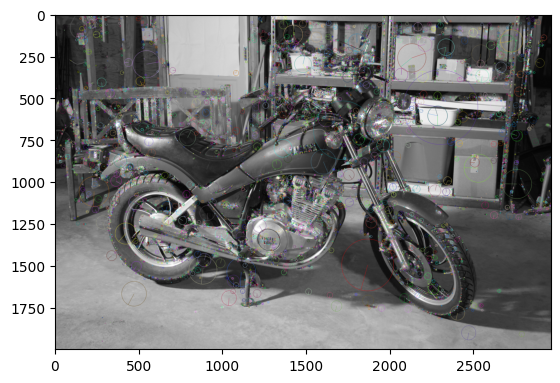

In [7]:
import cv2 as cv 
import numpy as np 
import matplotlib.pyplot as plt 
import os 


def SIFT(): 
    # root = os.getcwd()
    # imgPath = os.path.join(root,'demoImages//tesla.jpg')
    # imgGray = cv.imread(imgPath,cv.IMREAD_GRAYSCALE)
    imgGray = cv2.imread('./Imgs/Bike/im1.png', cv.IMREAD_GRAYSCALE)

    sift = cv.SIFT_create()
    keypoints = sift.detect(imgGray,None)
    imgGray = cv.drawKeypoints(imgGray,keypoints,imgGray,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

    plt.figure() 
    plt.imshow(imgGray)
    
    plt.show() 

if __name__ == '__main__': 
    SIFT() 

### Working Code

In [1]:

import cv2
import numpy as np


def Reprojection3D(image, disparity, f, b):
	Q = np.array([[1, 0, 0, -2964/2], [0, 1, 0, -2000/2], [0, 0, 0, f], [0, 0, -1/b, -124.343/b]])

	points = cv2.reprojectImageTo3D(disparity, Q)
	mask = disparity > disparity.min()
	# colors = image
	
	out_points = points[mask]
	out_colors = image[mask]
 
	sampled_indices = np.arange(0, out_points.shape[0], 25)
	out_points = out_points[sampled_indices]
	out_colors = out_colors[sampled_indices]
	
	verts = out_points.reshape(-1,3)
	colors = out_colors.reshape(-1,3).astype(np.uint8)
	verts = np.hstack([verts, colors])
	
	ply_header = '''ply
		format ascii 1.0
		element vertex {vert_num}
		property float32 x
		property float32 y
		property float32 z
		property uchar blue
		property uchar green
		property uchar red
		end_header
		'''.format(vert_num=len(verts)-1)
	with open('stereo.ply', 'w') as f:
		f.write(ply_header)

		# f.write(ply_header.encode('utf-8'))
		np.savetxt(f, verts, fmt='%.2f %.2f %.2f %d %d %d')
		# np.save(f, verts)


# cv2.namedWindow('Disparity', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Left Image', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Right Image', cv2.WINDOW_NORMAL)

K = np.array([[3979.911, 0, 1369.115], [0, 3979.911, 1019.507], [0, 0, 1]], dtype = np.float32)
D = np.zeros((5,1), dtype = np.float32)
downscale = 2
K[0,0] = K[0,0] / float(downscale)
K[1,1] = K[1,1] / float(downscale)
K[0,2] = K[0,2] / float(downscale)
K[1,2] = K[1,2] / float(downscale)

#imgL = cv2.imread('/home/arihant/stereo/im0.png')
#imgR = cv2.imread('/home/arihant/stereo/im1.png')
imgL = cv2.pyrDown(cv2.imread('./Imgs/Bike/im0.png'))
imgR = cv2.pyrDown(cv2.imread('./Imgs/Bike/im1.png'))


imgLgray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgRgray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

# Feature Extraction
# sift = cv2.xfeatures2d.SIFT_create()
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(imgLgray, None)
kp2, des2 = sift.detectAndCompute(imgRgray, None)

# Feature Matching and Outlier Rejection
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k = 2)

good = []
for m,n in matches:
	if m.distance < 0.70 * n.distance:
		good.append(m)

print(":::good", len(good))
		
pts1 = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

E, mask = cv2.findEssentialMat(pts1, pts2, K, method = cv2.RANSAC, prob = 0.999, threshold = 0.4, mask = None)
pts1 = pts1[mask.ravel() ==1]
pts2 = pts2[mask.ravel() ==1]
_, R, t, mask = cv2.recoverPose(E, pts1, pts2, K)

P1 = np.zeros((3,4))
P1 = np.matmul(K, P1)
P2 = np.hstack((R, t))
P2 = np.matmul(K, P2)
points1 = pts1.reshape(2, -1)
points2 = pts2.reshape(2, -1)
#cloud = cv2.triangulatePoints(P1, P2, pts1, pts2).reshape(-1, 4)[:, :3]
#ret, R, t, inliers = cv2.solvePnPRansac(cloud, pts2, K, D, cv2.SOLVEPNP_ITERATIVE)
# print(":::D", D)

R1, R2, P1, P2, Q, a, b = cv2.stereoRectify(K, D, K, D, (1482, 1000), R, t)
map1, map2 = cv2.initUndistortRectifyMap(K, D, R1, P1, (1482, 1000), cv2.CV_16SC2)
imgLrec = cv2.remap(imgL, map1, map2, cv2.INTER_CUBIC)

map3, map4 = cv2.initUndistortRectifyMap(K, D, R2, P2, (1482, 1000), cv2.CV_16SC2)
imgRrec = cv2.remap(imgR, map3, map4, cv2.INTER_CUBIC)

max_disparity = 199
min_disparity = 23
num_disparities = max_disparity - min_disparity
window_size = 5
stereo = cv2.StereoSGBM_create(minDisparity = min_disparity, numDisparities = num_disparities, blockSize = 5, uniquenessRatio = 5, speckleWindowSize = 5, speckleRange = 5, disp12MaxDiff = 2, P1 = 8*3*window_size**2, P2 = 32*3*window_size**2)

stereo2 = cv2.ximgproc.createRightMatcher(stereo)

lamb = 8000
sig = 1.5
visual_multiplier = 1.0
wls_filter = cv2.ximgproc.createDisparityWLSFilter(stereo)
wls_filter.setLambda(lamb)
wls_filter.setSigmaColor(sig)

disparity = stereo.compute(imgLrec, imgRrec)

#disparity = np.int16(disparity)
#_, disparity = cv2.threshold(disparity, 0, max_disparity * 16, cv2.THRESH_TOZERO)
#disparity = (disparity / 16).astype(np.uint8)

disparity2 = stereo2.compute(imgRrec, imgLrec)
disparity2 = np.int16(disparity2)

#_, disparity2 = cv2.threshold(disparity2, 0, max_disparity * 16, cv2.THRESH_TOZERO)
#disparity2 = (disparity2 / 16).astype(np.uint8)

filteredImg = wls_filter.filter(disparity, imgL, None, disparity2)
_, filteredImg = cv2.threshold(filteredImg, 0, max_disparity * 16, cv2.THRESH_TOZERO)
filteredImg = (filteredImg / 16).astype(np.uint8)


baseline = 193.001/2
f = 3979.911/2

Reprojection3D(imgL, filteredImg, f, baseline)

# cv2.imshow('Left Image', imgLrec)
# cv2.imshow('Right Image', imgRrec)

# cv2.imshow('Disparity', filteredImg)
cv2.imwrite('match.png', filteredImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

:::good 2350


### Middlebury Cam config

cam0=[1733.74 0 792.27; 0 1733.74 541.89; 0 0 1]

cam1=[1733.74 0 792.27; 0 1733.74 541.89; 0 0 1]

doffs=0

baseline=536.62

width=1920

height=1080

ndisp=170

vmin=55

vmax=142

### Basler Cam config

[[769.98980856   0.         754.86549091]
 [  0.         761.05275409 594.04434858]
 [  0.           0.           1.        ]]

[[2.85015264e+03 0.00000000e+00 2.05299991e+03]
 [0.00000000e+00 2.85129147e+03 1.49473327e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

baseline = 300

width = 1592

height = 1200

ndisp = 432

vmax = 578

vmin = 0



### Nothing phone cam config

[[2.85015264e+03 0.00000000e+00 2.05299991e+03]
 [0.00000000e+00 2.85129147e+03 1.49473327e+03]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

baseline = 300 - its in mm

width = 4080

height = 3072

ndisp = 1600 

vmax = 2138 

vmin = 0

### Axis Cam config

[[3.00647856e+03 0.00000000e+00 6.84804147e+02]
 [0.00000000e+00 3.00570115e+03 6.45743205e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]]

baseline = 300

width = 1920

height = 1080

ndisp = 384 

vmax = 602 

vmin = 0



### bigpass Cam

[[1.57395822e+03 0.00000000e+00 9.30883915e+02]
 [0.00000000e+00 1.56548039e+03 5.42345806e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 

D = np.array([0.08109633, -0.57639322, 0.00376522, 0.00103847, 0.9499843])

baseline = 300

width = 1920

height = 1080

ndisp = 960

vmax = 1050

vmin = 0


### Arihant's code for our images

In [99]:
import cv2
import numpy as np


def Reprojection3D(image, disparity, f, b):
	Q = np.array([[1, 0, 0, -2964/2], [0, 1, 0, -2000/2], [0, 0, 0, f], [0, 0, -1/b, -124.343/b]])

	points = cv2.reprojectImageTo3D(disparity, Q)
	mask = disparity > disparity.min()
	# colors = image

	
	out_points = points[mask]
	out_colors = image[mask]
	
	verts = out_points.reshape(-1,3)
	colors = out_colors.reshape(-1,3).astype(np.uint8)
	# import pyvista as pv
	# point_cloud=pv.PolyData(verts)
	# print(":::sanity", np.allclose(points, point_cloud.points))
	# point_cloud.plot(eye_dome_lighting=True)
	verts = np.hstack([verts, colors])
	
	ply_header = '''ply
		format ascii 1.0
		element vertex %(vert_num)d
		property float x
		property float y
		property float z
		property uchar blue
		property uchar green
		property uchar red
		end_header
		'''
	# ply_header = '''ply
	# 	format ascii 1.0
	# 	element vertex %(vert_num)d
	# 	property float x
	# 	property float y
	# 	property float z
	# 	end_header
	# 	'''
	with open('stereoo.ply', 'w') as f:
		f.write(ply_header %dict(vert_num = len(verts)))
		np.savetxt(f, verts, '%f %f %f %d %d %d')
		# np.savetxt(f, verts, '%f %f %f')


# cv2.namedWindow('Disparity', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Left Image', cv2.WINDOW_NORMAL)
# cv2.namedWindow('Right Image', cv2.WINDOW_NORMAL)
# 1758.23 0 872.36; 0 1758.23 552.32; 0 0 1
# chess = np.array([[1758.23, 0, 872.36], [0, 1758.23, 552.32], [0, 0, 1]], dtype=np.float32)

# Basler config:::
# basler = np.array([[769.99, 0, 754.86], [0, 761.05, 594.04], [0,0,1]])
# baseline = 300
# width = 1592
# height = 1200
# ndisp = 432
# vmax = 578
# vmin = 0


# Nothing cam config:::
# nothing = np.array([[769.99, 0, 754.86], [0, 761.05, 594.04], [0,0,1]])
# baseline = 300
# width = 4080
# height = 3072
# ndisp = 1600 
# vmax = 2138 
# vmin = 0

# Axis cam config:::
# axis = np.array([[3006.48, 0, 684.8], [0, 3005.7, 645.7], [0,0,1]])
# baseline = 300
# width = 1920
# height = 1080
# ndisp = 170
# vmax = 142
# vmin = 55

# Bigpass Cam:::
bigpass = np.array([[1573.95822, 0, 930.883915], [0, 1565.48039, 542.345806], [0, 0, 1]])
baseline = 150
width = 1920
height = 1080
ndisp = 200
vmax = 500
vmin = 0


# Online cam config:::
# artroom = np.array([[1733.74, 0, 792.27], [0, 1733.74, 541.89], [0, 0, 1]], dtype=np.float32)
# baseline = 536.62
# doffs = 0  # This may be used if you need to adjust for any offset in the disparity computation, not used in this snippet

# # Image dimensions
# width = 1920
# height = 1080

# # Disparity settings
# ndisp = 170
# vmin = 55
# vmax = 142

K = bigpass.copy()
D = np.zeros((5,1), dtype = np.float32)
# D = np.array([0.08109633, -0.57639322, 0.00376522, 0.00103847, 0.9499843])
downscale = 2
# K[0,0] = K[0,0] / float(downscale)
# K[1,1] = K[1,1] / float(downscale)
# K[0,2] = K[0,2] / float(downscale)
# K[1,2] = K[1,2] / float(downscale)

imgL = cv2.imread('.\\Imgs\\bigpass\\ster\\Left1.jpg')
imgR = cv2.imread('.\\Imgs\\bigpass\\ster\\Right1.jpg')


imgLgray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgRgray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

# Feature Extraction
sift = cv2.SIFT_create()

kp1, des1 = sift.detectAndCompute(imgLgray, None)
kp2, des2 = sift.detectAndCompute(imgRgray, None)

# Feature Matching and Outlier Rejection
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k = 2)

good = []
for m,n in matches:
	if m.distance < 0.70 * n.distance:
		good.append(m)

print(":::good", len(good))
		
pts1 = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1,1,2)
pts2 = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1,1,2)

E, mask = cv2.findEssentialMat(pts1, pts2, K, method = cv2.RANSAC, prob = 0.999, threshold = 0.4, mask = None)
pts1 = pts1[mask.ravel() ==1]
pts2 = pts2[mask.ravel() ==1]
_, R, t, mask = cv2.recoverPose(E, pts1, pts2, K)

P1 = np.zeros((3,4))
P1 = np.matmul(K, P1)
P2 = np.hstack((R, t))
P2 = np.matmul(K, P2)
points1 = pts1.reshape(2, -1)
points2 = pts2.reshape(2, -1)
#cloud = cv2.triangulatePoints(P1, P2, pts1, pts2).reshape(-1, 4)[:, :3]
#ret, R, t, inliers = cv2.solvePnPRansac(cloud, pts2, K, D, cv2.SOLVEPNP_ITERATIVE)

R1, R2, P1, P2, Q, a, b = cv2.stereoRectify(K, D, K, D, (width,height), R, t)
map1, map2 = cv2.initUndistortRectifyMap(K, D, R1, P1, (width,height), cv2.CV_16SC2)
imgLrec = cv2.remap(imgL, map1, map2, cv2.INTER_CUBIC)

map3, map4 = cv2.initUndistortRectifyMap(K, D, R2, P2, (width,height), cv2.CV_16SC2)
imgRrec = cv2.remap(imgR, map3, map4, cv2.INTER_CUBIC)

max_disparity = vmax
min_disparity = vmin
num_disparities = ndisp
window_size = 5
stereo = cv2.StereoSGBM_create(
	minDisparity = min_disparity, 
	numDisparities = num_disparities, 
	blockSize = 5, 
	uniquenessRatio = 5, 
	speckleWindowSize = 5, 
	speckleRange = 5, 
	disp12MaxDiff = 2, 
	P1 = 8*3*window_size**2, 
	P2 = 32*3*window_size**2
)

stereo2 = cv2.ximgproc.createRightMatcher(stereo)

lamb = 8000
sig = 1.5
visual_multiplier = 1.0
wls_filter = cv2.ximgproc.createDisparityWLSFilter(stereo)
wls_filter.setLambda(lamb)
wls_filter.setSigmaColor(sig)

disparity = stereo.compute(imgLrec, imgRrec)

#disparity = np.int16(disparity)
#_, disparity = cv2.threshold(disparity, 0, max_disparity * 16, cv2.THRESH_TOZERO)
#disparity = (disparity / 16).astype(np.uint8)

disparity2 = stereo2.compute(imgRrec, imgLrec)
disparity2 = np.int16(disparity2)

#_, disparity2 = cv2.threshold(disparity2, 0, max_disparity * 16, cv2.THRESH_TOZERO)
#disparity2 = (disparity2 / 16).astype(np.uint8)

filteredImg = wls_filter.filter(disparity, imgL, None, disparity2)
_, filteredImg = cv2.threshold(filteredImg, 0, max_disparity * 16, cv2.THRESH_TOZERO)
filteredImg = (filteredImg / 16).astype(np.uint8)


baseline = baseline #/2
f = K[0][0] #/2

Reprojection3D(imgL, filteredImg, f, baseline)

# cv2.imshow('Left Image', imgLrec)
# cv2.imshow('Right Image', imgRrec)
# cv2.imshow('Disparity', filteredImg)
cv2.imwrite('match1.png', filteredImg)
cv2.waitKey(0)
cv2.destroyAllWindows()

:::good 303


In [51]:
import cv2
import numpy as np

def Reprojection3D(image, disparity, f, b):
    Q = np.array([[1, 0, 0, -684.8], [0, 1, 0, -645.7], [0, 0, 0, f], [0, 0, -1/b, 0]])
    points = cv2.reprojectImageTo3D(disparity, Q)
    mask = disparity > disparity.min()
    out_points = points[mask]
    out_colors = image[mask]
    verts = out_points.reshape(-1, 3)
    colors = out_colors.reshape(-1, 3).astype(np.uint8)
    verts = np.hstack([verts, colors])
    ply_header = '''ply
format ascii 1.0
element vertex %(vert_num)d
property float x
property float y
property float z
property uchar blue
property uchar green
property uchar red
end_header
'''
    with open('stereoo.ply', 'w') as f:
        f.write(ply_header % dict(vert_num=len(verts)))
        np.savetxt(f, verts, '%f %f %f %d %d %d')

# Load images
imgL = cv2.imread('.\\Imgs\\Axis\\Left1.jpg')
imgR = cv2.imread('.\\Imgs\\Axis\\Right1.jpg')  # Load the corresponding right image

if imgL is None or imgR is None:
    raise Exception("Images not loaded properly. Check file paths.")

# Convert to grayscale
imgLgray = cv2.cvtColor(imgL, cv2.COLOR_BGR2GRAY)
imgRgray = cv2.cvtColor(imgR, cv2.COLOR_BGR2GRAY)

# Camera matrix and distortion coefficients
axis = np.array([[3006.48, 0, 684.8], [0, 3005.7, 645.7], [0, 0, 1]])
baseline = 0.3  # 300 mm
K = axis.copy()
D = np.zeros((5, 1), dtype=np.float32)

# Assume some initial rotation and translation between the cameras
# These values are typically obtained through stereo calibration
R = np.eye(3)  # Placeholder for actual rotation matrix
T = np.array([[baseline], [0], [0]])  # Translation vector with baseline as the x-component

# Stereo rectification
R1, R2, P1, P2, Q, _, _ = cv2.stereoRectify(K, D, K, D, (imgL.shape[1], imgL.shape[0]), R, T)
map1x, map1y = cv2.initUndistortRectifyMap(K, D, R1, P1, (imgL.shape[1], imgL.shape[0]), cv2.CV_16SC2)
map2x, map2y = cv2.initUndistortRectifyMap(K, D, R2, P2, (imgR.shape[1], imgR.shape[0]), cv2.CV_16SC2)
imgLrec = cv2.remap(imgL, map1x, map1y, cv2.INTER_LINEAR)
imgRrec = cv2.remap(imgR, map2x, map2y, cv2.INTER_LINEAR)

# Stereo matching
num_disparities = 720  # Should be divisible by 16
block_size = 5
stereo = cv2.StereoSGBM_create(
    minDisparity=0,
    numDisparities=num_disparities,
    blockSize=block_size,
    P1=8 * 3 * block_size ** 2,
    P2=32 * 3 * block_size ** 2,
    disp12MaxDiff=1,
    uniquenessRatio=10,
    speckleWindowSize=100,
    speckleRange=32
)

# Compute disparity
disparity = stereo.compute(imgLrec, imgRrec).astype(np.float32) / 16.0

# Normalize the disparity map for better visualization
disparity_normalized = cv2.normalize(disparity, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)
disparity_normalized = np.uint8(disparity_normalized)

# Save and display the disparity image
cv2.imwrite('disparity_normalized.png', disparity_normalized)
# cv2.imshow('Disparity', disparity_normalized)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Reproject to 3D and save the point cloud
Reprojection3D(imgL, disparity, K[0, 0], baseline)


### Mesh generate

In [2]:
import numpy as np
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [3]:
try:
    pcd = o3d.io.read_point_cloud(".\stereoo.ply")
    # pcd = o3d.io.read_point_cloud(".\Imgs\PLYs\Buggy.ply")
    # pcd = o3d.io.read_point_cloud("./Imgs/PLYs/point_cloud_00001.ply")
    # pcd = o3d.t.io.read_point_cloud('./stereo.ply').to_legacy_pointcloud()
    print("Done??")
except Exception as e:
    print("Failed to read the point cloud:", e)
pcd.estimate_normals(search_param=o3d.geometry.KDTreeSearchParamHybrid(radius=0.1, max_nn=30))

[Open3D WARNING] Read PLY failed: unable to read file: .\stereoo.ply
Done??


In [4]:

import winsound


nn_distances = pcd.compute_nearest_neighbor_distance()
print(":::1")
avg_nn_distance = np.mean(nn_distances)
print(":::2")
radius_of_ball = 3 * avg_nn_distance
print(":::3")
bpa_mesh = o3d.geometry.TriangleMesh\
    .create_from_point_cloud_ball_pivoting(pcd,o3d.utility.DoubleVector([radius_of_ball, radius_of_ball * 2 ]))
print(":::4")
num_vertices = len(bpa_mesh.vertices)
colors = np.random.rand(num_vertices, 3)  # RGB colors

# Assign colors to the mesh vertices
bpa_mesh.vertex_colors = o3d.utility.Vector3dVector(colors)
o3d.io.write_triangle_mesh("output_mesh.ply", bpa_mesh)

frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)
# o3d.visualization.draw_geometries([bpa_mesh])

:::1
:::2
:::3
:::4


In [6]:
import winsound
frequency = 2500  # Set Frequency To 2500 Hertz
duration = 1000  # Set Duration To 1000 ms == 1 second
winsound.Beep(frequency, duration)

In [5]:
our_mesh = bpa_mesh
our_img = imgL
our_img = cv2.cvtColor(our_img, cv2.COLOR_BGR2RGB)

In [7]:
camera_matrix = np.array([[1733.74, 0, 792.27],
                          [0, 1733.74, 541.89],
                          [0, 0, 1]], dtype=np.float32)
baseline = 536.62
doffs = 0

def project_vertex_to_image(vertex, camera_matrix):
    # Assuming the vertex is a 3D point [X, Y, Z]
    X, Y, Z = vertex

    # Projection from 3D world coordinates to 2D image coordinates
    # X_image = (fx * X) / Z + cx
    # Y_image = (fy * Y) / Z + cy
    fx, fy = camera_matrix[0, 0], camera_matrix[1, 1]
    cx, cy = camera_matrix[0, 2], camera_matrix[1, 2]

    u = (fx * X / Z) + cx
    v = (fy * Y / Z) + cy

    return int(u), int(v)

# # Test with a sample vertex
# sample_vertex = [1.0, 2.0, 3.0]  # Replace with an actual vertex from your mesh
# u, v = project_vertex_to_image(sample_vertex, camera_matrix)
# print(f"Projected coordinates: (u, v) = ({u}, {v})")

vertex_colors = []

for vertex in np.asarray(our_mesh.vertices):
    u, v = project_vertex_to_image(vertex, camera_matrix)
    # print(":::vertex", vertex, end=' ')
    # Clamp the coordinates to image dimensions
    u = np.clip(u, 0, our_img.shape[1] - 1)
    v = np.clip(v, 0, our_img.shape[0] - 1)
    # Get the color from the our_img
    color = our_img[v, u] / 255.0  # Normalize color to [0, 1]
    vertex_colors.append(color)
    # print(color)

# Set vertex colors to the our_mesh
our_mesh.vertex_colors = o3d.utility.Vector3dVector(np.array(vertex_colors))

# Save mesh
o3d.io.write_triangle_mesh("color_mesh.ply", our_mesh)

# Visualize the colored our_mesh
# o3d.visualization.draw_geometries([our_mesh])

:::vertex [ 3525.24707   2804.492432 -4862.260742] :::vertex [ 3522.442627  2804.492432 -4862.260742] :::vertex [ 3519.637939  2804.492432 -4862.260742] :::vertex [ 3516.833496  2804.492432 -4862.260742] :::vertex [ 3514.029053  2804.492432 -4862.260742] :::vertex [ 3511.224609  2804.492432 -4862.260742] :::vertex [ 3526.852051  2819.226318 -4887.805664] :::vertex [ 3524.032959  2819.226318 -4887.805664] :::vertex [ 3502.811035  2804.492432 -4862.260742] :::vertex [ 3500.006592  2804.492432 -4862.260742] :::vertex [ 3497.202148  2804.492432 -4862.260742] :::vertex [ 3494.397705  2804.492432 -4862.260742] :::vertex [ 3509.936768  2819.226318 -4887.805664] :::vertex [ 3507.117676  2819.226318 -4887.805664] :::vertex [ 3504.29834   2819.226318 -4887.805664] :::vertex [ 3501.479004  2819.226318 -4887.805664] :::vertex [ 3480.375244  2804.492432 -4862.260742] :::vertex [ 3495.840576  2819.226318 -4887.805664] :::vertex [ 3493.021484  2819.226318 -4887.805664] :::vertex [ 3490.202148  2819.2

KeyboardInterrupt: 

In [38]:
### Caliberatoin
# fx
#  =3280.23167 pixels
# fy
#  =3278.71299 pixels
# cx=1989.52824 pixels
# cy=1685.40407 pixels

fx = 3280.23167  # Focal length along x-axis (in pixels)
fy = 3278.71299  # Focal length along y-axis (in pixels)
cx = 1989.52824   # Principal point x-coordinate (in pixels)
cy = 1685.40407   # Principal point y-coordinate (in pixels)
camera_matrix = mtx

baseline = 0.20  # 10 centimeters (adjust according to your setup)
focal_length = fx  # Assuming fx = fy for simplicity


In [39]:
import cv2
import numpy as np

# Load images
image1 = cv2.imread('./Imgs/bott/IMG_20240424_145035970.jpg')
image2 = cv2.imread('./Imgs/bott/IMG_20240424_145040315.jpg')

# Convert images to grayscale
gray1 = cv2.cvtColor(image1, cv2.COLOR_BGR2GRAY)
gray2 = cv2.cvtColor(image2, cv2.COLOR_BGR2GRAY)

# Perform feature extraction (e.g., using ORB)
orb = cv2.ORB_create()
keypoints1, descriptors1 = orb.detectAndCompute(gray1, None)
keypoints2, descriptors2 = orb.detectAndCompute(gray2, None)

# Match keypoints between the two images
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = bf.match(descriptors1, descriptors2)

# Sort matches based on distance
matches = sorted(matches, key=lambda x: x.distance)

# Extract matched keypoints
matched_keypoints1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
matched_keypoints2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)


In [40]:
# Compute the fundamental matrix and essential matrix
F, mask = cv2.findFundamentalMat(matched_keypoints1, matched_keypoints2, cv2.FM_LMEDS)
E = np.dot(np.dot(np.transpose(camera_matrix), F), camera_matrix)

# Decompose the essential matrix to get relative pose
_, R, t, _ = cv2.recoverPose(E, matched_keypoints1, matched_keypoints2, cameraMatrix=camera_matrix)

# Compute the depth map
depth_map = np.zeros_like(gray1, dtype=np.float32)
for i in range(depth_map.shape[0]):
    for j in range(depth_map.shape[1]):
        # Check if the index is within bounds of matched_keypoints1
        if i < matched_keypoints1.shape[0] and j != matched_keypoints1[i, 0, 0]:
            depth_map[i, j] = (baseline * focal_length) / (j - matched_keypoints1[i, 0, 0])
        else:
            depth_map[i, j] = 0.0  # Set to zero if index is out of boun


In [41]:
# Initialize 3D point cloud
point_cloud = []

principal_point_x = cx
principal_point_y = cy

# Generate 3D points
for i in range(depth_map.shape[0]):
    for j in range(depth_map.shape[1]):
        if depth_map[i, j] > 0:
            X = (j - principal_point_x) * depth_map[i, j] / focal_length
            Y = (i - principal_point_y) * depth_map[i, j] / focal_length
            Z = depth_map[i, j]
            point_cloud.append([X, Y, Z])

# Convert point cloud to NumPy array
point_cloud = np.array(point_cloud)

In [42]:
len(point_cloud)

100801

In [43]:
mean_error = 0
for i in range(len(objpoints)):
    imgpoints2, _ = cv2.projectPoints(objpoints[i], rvecs[i], tvecs[i], mtx, dist)
    error = cv2.norm(imgpoints[i], imgpoints2, cv2.NORM_L2) / len(imgpoints2)
    mean_error += error

mean_error /= len(objpoints)
print(f"Mean reprojection error: {mean_error}")

Mean reprojection error: 1.0900149001970985


In [44]:
import numpy as np
import pymeshlab

# Assuming point_cloud is a numpy array of shape (N, 3) representing the 3D points

# Create a MeshSet object
ms = pymeshlab.MeshSet()

# Create a new Mesh (empty)
new_mesh = pymeshlab.Mesh(vertex_matrix=point_cloud)

# Add the mesh to the MeshSet
ms.add_mesh(new_mesh)

# Optional: Create a Delaunay triangulation from the vertices to form a mesh
# This step requires that the Delaunay triangulation is available and applicable in PyMeshLab
# Check if the filter exists: print(ms.print_filter_list())
# If available:
# ms.apply_filter('delaunay_triangulation', preserveboundary=True, area=0)

# Save the MeshSet as a PLY file
ms.save_current_mesh('output1.ply')

### Camera Caliberation

In [83]:
import cv2
import numpy as np
import glob

# Termination criteria for the corner sub-pixel refinement.
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 30, 0.001)

num_rows = 9
num_cols = 7

req_row = num_rows - 1
req_col = num_cols - 1

# Prepare object points (0,0,0), (1,0,0), (2,0,0) ..., (6,5,0)
objp = np.zeros((req_col*req_row, 3), np.float32)
objp[:, :2] = np.mgrid[0:req_row, 0:req_col].T.reshape(-1, 2)

# Arrays to store object points and image points from all images.
objpoints = []  # 3d points in real world space
imgpoints = []  # 2d points in image plane.

# images = glob.glob('./Imgs/drive-download/*.jpg')
images = glob.glob('.\Imgs\\bigpass\*.jpg')
print(f"Found {len(images)} images for calibration")

for fname in images:
    img = cv2.imread(fname)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chess board corners
    ret, corners = cv2.findChessboardCorners(gray, (req_row,req_col), None)

    # If found, add object points, image points
    if ret == True:
        objpoints.append(objp)

        corners2 = cv2.cornerSubPix(gray, corners, (11,11), (-1,-1), criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        img = cv2.drawChessboardCorners(img, (req_row,req_col), corners2, ret)
        cv2.imshow('img', img)
        cv2.waitKey(500)
print(len(objpoints))

cv2.destroyAllWindows()


# Perform calibration
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

# The camera matrix (mtx) contains focal length and optical centers.
# The distortion coefficients (dist) account for radial and tangential issues.

print("RET: {:.4f}".format(ret), ret, "\nMTX:", mtx, "\nDIST:", dist, "\nRVECS:", rvecs, "\nTVECS:", tvecs)


Found 15 images for calibration
15
RET: 0.8140 0.8139998610449078 
MTX: [[1.57395822e+03 0.00000000e+00 9.30883915e+02]
 [0.00000000e+00 1.56548039e+03 5.42345806e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 
DIST: [[ 0.08109633 -0.57639322  0.00376522  0.00103847  0.9499843 ]] 
RVECS: (array([[0.13485777],
       [0.17539308],
       [0.01379445]]), array([[0.21958338],
       [0.73686156],
       [0.10262755]]), array([[ 0.39796854],
       [-0.08773585],
       [-0.3315754 ]]), array([[-0.85554704],
       [ 0.43931193],
       [ 0.19559477]]), array([[-0.16096213],
       [ 0.81014462],
       [ 0.15044945]]), array([[ 0.16878223],
       [ 0.36602079],
       [-0.10132217]]), array([[ 0.02468575],
       [-0.13108181],
       [-0.18703653]]), array([[0.02426396],
       [0.62166982],
       [0.0687992 ]]), array([[-0.62457697],
       [ 0.16059743],
       [-0.07117391]]), array([[-0.1289238 ],
       [-0.62712365],
       [-0.48768768]]), array([[-0.02982453],
       [ 0

In [79]:
print(len(objpoints), len(imgpoints))

17 17


In [80]:
print("RET: {:.4f}".format(ret), ret, "\nMTX:", mtx, "\nDIST:", dist, "\nRVECS:", rvecs, "\nTVECS:", tvecs)

RET: 1.2549 1.2549466282209323 
MTX: [[1.58523929e+03 0.00000000e+00 8.90993234e+02]
 [0.00000000e+00 1.57293566e+03 5.49796122e+02]
 [0.00000000e+00 0.00000000e+00 1.00000000e+00]] 
DIST: [[-0.04701903  0.29398344  0.00549192 -0.00252733 -0.80554331]] 
RVECS: (array([[0.13495793],
       [0.19967771],
       [0.0126854 ]]), array([[0.22441518],
       [0.76340633],
       [0.10179609]]), array([[6.27886617e-01],
       [4.85729888e-01],
       [6.09598323e-04]]), array([[ 0.39760468],
       [-0.06740858],
       [-0.33668328]]), array([[ 0.02425624],
       [-0.58923462],
       [-0.41627803]]), array([[-1.04881111],
       [ 0.44708196],
       [ 0.31225493]]), array([[-0.84838068],
       [ 0.46278969],
       [ 0.20659758]]), array([[-0.15507163],
       [ 0.8368767 ],
       [ 0.15456107]]), array([[ 0.31014126],
       [ 0.87634925],
       [-0.01735724]]), array([[ 0.16802154],
       [ 0.39282619],
       [-0.10277953]]), array([[ 0.02847766],
       [-0.11537531],
       [-0.

Second Attempt

### SECOND ATTEMPT

In [2]:
import cv2
import numpy as np

# Load images
image1 = cv2.imread('./Imgs/mouse1.jpg', cv2.IMREAD_GRAYSCALE)
image2 = cv2.imread('./Imgs/mouse2.jpg', cv2.IMREAD_GRAYSCALE)

# Initialize ORB detector
orb = cv2.ORB_create()

# Find the keypoints and descriptors
kp1, des1 = orb.detectAndCompute(image1, None)
kp2, des2 = orb.detectAndCompute(image2, None)

# Create matcher and find matches
matcher = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)
matches = matcher.match(des1, des2)

# Sort matches by distance (best matches first)
matches = sorted(matches, key=lambda x: x.distance)

In [3]:
# Extract location of good matches
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

# Find fundamental matrix
F, mask = cv2.findFundamentalMat(points1, points2, cv2.FM_LMEDS)

# Select inlier points
points1 = points1[mask.ravel() == 1]
points2 = points2[mask.ravel() == 1]

# Essential matrix and recover pose
E, _ = cv2.findEssentialMat(points1, points2, focal=1.0, pp=(0,0), method=cv2.RANSAC, prob=0.999, threshold=1.0)
_, R, t, _ = cv2.recoverPose(E, points1, points2)

In [4]:
# Assuming camera matrix is identity, for simplicity
P1 = np.hstack((np.eye(3, 3), np.zeros((3, 1))))
P2 = np.hstack((R, t))

points_3d = cv2.triangulatePoints(P1, P2, points1.T, points2.T)
points_3d /= points_3d[3]

# Convert to a nicer format
points_3d = points_3d[:3].T

In [5]:
def write_ply(filename, points):
    with open(filename, 'w') as file:
        file.write("ply\n")
        file.write("format ascii 1.0\n")
        file.write("element vertex %d\n" % len(points))
        file.write("property float x\n")
        file.write("property float y\n")
        file.write("property float z\n")
        file.write("end_header\n")
        for p in points:
            file.write("%f %f %f\n" % (p[0], p[1], p[2]))

write_ply('output.ply', points_3d)

In [20]:
# Camera calibration settings
camera_matrix = np.array([[2.84824695e+03, 0.00000000e+00, 2.02041904e+03],
        [0.00000000e+00, 2.85001000e+03, 1.51079453e+03],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]])

Commandssssssss

In [6]:
!pip install open3d

In [4]:
!python -V


Python 3.8.19


In [3]:
!pip install numpy opencv-python matplotlib pymeshlab

  Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl.metadata (20 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
     ---------------------------------------- 0.0/162.8 kB ? eta -:--:--
     ----------------------------------- -- 153.6/162.8 kB 9.0 MB/s eta 0:00:01
     -------------------------------------- 162.8/162.8 kB 3.2 MB/s eta 0:00:00
  Using cached pyparsing-3.1.2-py3-none-any.whl.metadata (5.1 kB)
Using cached opencv_python-4.9.0.80-cp37-abi3-win_amd64.whl (38.6 MB)
   ---------------------------------------- 0.0/7.5 MB ? eta -:--:--
   - -------------------------------------- 0.2/7.5 MB 4.4 MB/s eta 0:00:02
   -- ------------------------------------- 0.4/7.5 MB 4.2 MB/s eta 0:00:02
   --- ------------------------------------ 0.7/7.5 MB 4.6 MB/s eta 0:00:02
   ---- ----------------------------------- 0.8/7.5 MB 4.5 MB/s eta 0:00:02
   ---- ----------------------------------- 0.9/7.5 MB 4.5 MB/s eta 0:00:02
   ------ -----------------------------

In [3]:
import open3d as o3d

Jupyter environment detected. Enabling Open3D WebVisualizer.
[Open3D INFO] WebRTC GUI backend enabled.
[Open3D INFO] WebRTCWindowSystem: HTTP handshake server disabled.


In [2]:
!open3d -V

***************************************************
* Open3D: A Modern Library for 3D Data Processing *
*                                                 *
* Version 0.18.0                                  *
* Docs    https://www.open3d.org/docs             *
* Code    https://github.com/isl-org/Open3D       *
***************************************************
Open3D 0.18.0


In [4]:
!pip install pypylon

In [7]:
!pip install lightgbm

     ---------------------------------------- 0.0/59.0 kB ? eta -:--:--
     ---------------------------------------- 59.0/59.0 kB 1.6 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.3 MB ? eta -:--:--
   -------- ------------------------------- 0.3/1.3 MB 5.8 MB/s eta 0:00:01
   -------------- ------------------------- 0.5/1.3 MB 5.1 MB/s eta 0:00:01
   ---------------------- ----------------- 0.7/1.3 MB 5.3 MB/s eta 0:00:01
   ----------------------------- ---------- 1.0/1.3 MB 5.3 MB/s eta 0:00:01
   ------------------------------------ --- 1.2/1.3 MB 5.2 MB/s eta 0:00:01
   ---------------------------------------  1.3/1.3 MB 5.3 MB/s eta 0:00:01
   ---------------------------------------- 1.3/1.3 MB 4.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/42.2 MB ? eta -:--:--
   ---------------------------------------- 0.3/42.2 MB 6.8 MB/s eta 0:00:07
    --------------------------------------- 0.6/42.2 MB 6.1 MB/s eta 0:00:07
    -------------------

In [1]:
!python -c "import open3d as o3d; print(o3d.__version__)"

0.18.0


In [17]:
!pip install opencv-python numpy pillow